In [1]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

### Convolution Operations on images
- Convolution is an operation where a nxn kernal/matrix get multiplied in fashion of sliding window with an image and generate a new image. 

3x3 Kernal created by us 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


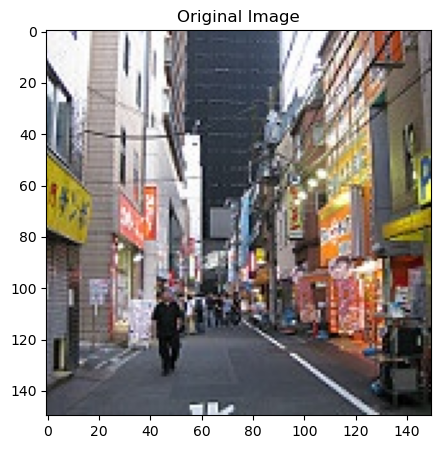

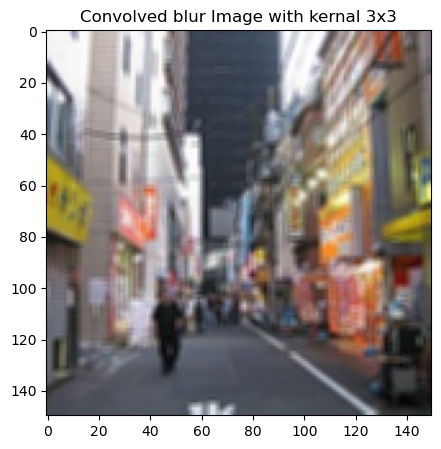

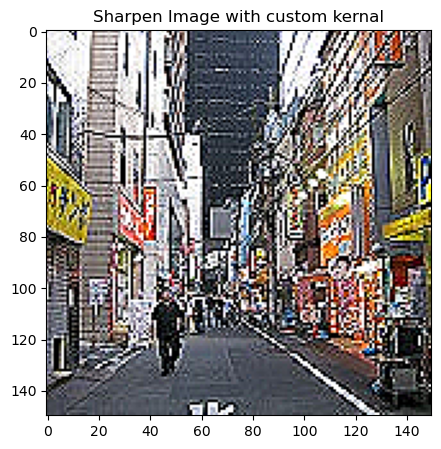

In [2]:
# Before performing a convolution opertation we have to specify the kernal of size n x n
kernal_3x3 = np.ones((3,3), np.float32) / 9 # here i am creating a kernal of size 3x3 the /9 means i am dividing each element in 3x3 matrix by 9
print("3x3 Kernal created by us \n", kernal_3x3)

# let's blur the image using the kernal we have created 
path = "images/284.jpg"
img = cv2.imread(path)
show_image(img, "Original Image",5)

# use cv2.filter2D(img, depth, kernal) to perform convolution operation on image using kernal to blue an image 
# always make sure the output after convolution depends on the kernal
blur_img = cv2.filter2D(img, -1, kernal_3x3)
show_image(blur_img, "Convolved blur Image with kernal 3x3",5)

# Let's sharpen the image, here i am using predefined kernal values you can get the same on google
kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

sharp_img = cv2.filter2D(img, -1, kernel_sharpen)
show_image(sharp_img, "Sharpen Image with custom kernal",5)


### Image Bluring using OpenCV Methods

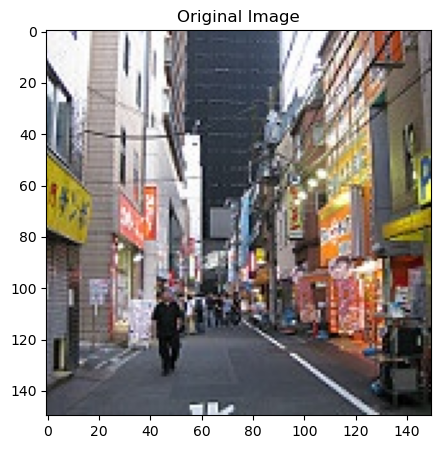

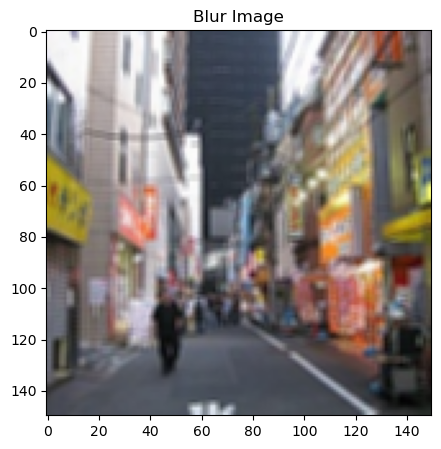

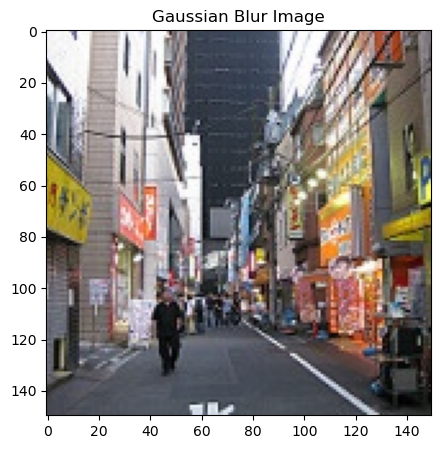

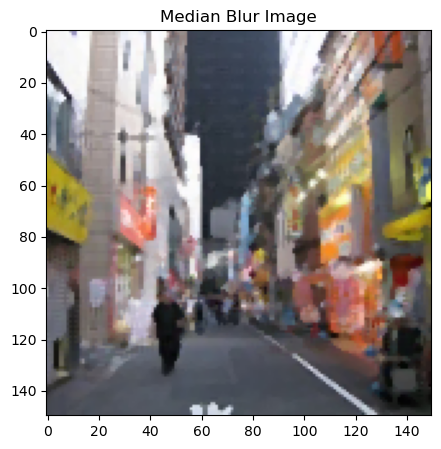

In [3]:
path = "images/284.jpg"
img = cv2.imread(path)
show_image(img, "Original Image",5)

# use cv2.blur(img,(kernalsize (n,n))) to blue and image 
# the cv2.blur() methods uses normalized kernal to blur an image. the result of cv2.blur and the kernal_3x3 we did is same
blur_img = cv2.blur(img,(3,3))
show_image(blur_img, "Blur Image",5)

# use cv2.GaussianBlur(img, kernal_size, sigma_or_blur_intensity) # sigma value decide how much blur image will produce.
# gaussianblur uses a fixed gaussian kernal to blur an image.
gaussian_blured_img = cv2.GaussianBlur(img, (3,3), 0.4)
show_image(gaussian_blured_img, "Gaussian Blur Image",5)

# use cv2.medianBlur(img, kernal_size_in_int)
# baasically median blur calculate the median value of all pixels under the kernal window/size, then replace the center value
# of the kernal window with the median value

# | 0 1 2 3 4 5 6 |
# | 1 2 3 4 5 6 7 |
# | 2 3 4 5 6 7 8 |
# | 3 4 5 6 7 8 9 |

# assume that the kernal size is 3 i.e (3x3) hence the median blur result for above image looks like
# for first kernal window of median blue kernal looks liks this

# | 0 1 2 |
# | 1 2 3 |
# | 2 3 4 |

# assume that the median value is 9 (assumption only for example purpose) then the median blur filter replace the center valu
# i.e 2 with median i.e 9 and it looks like 

# | 0 1 2 3 4 5 6 |
# | 1 *9* 3 4 5 6 7 |  2 will be repalce by 9
# | 2 3 4 5 6 7 8 |
# | 3 4 5 6 7 8 9 |

median_blured_img = cv2.medianBlur(img, 3)
show_image(median_blured_img, "Median Blur Image",5)
